### Baseline model for pulsar wind nebula evolution 
Taken from the pwn population paper by the HESS collaboration, A&A 612 (2018) A2. 
(See appendix and table A.2)

In [11]:
import numpy as np
from astropy import units as u
#from astropy.io import fits
#from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

%matplotlib inline

In [12]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


In [16]:
edot = 10.**np.linspace(np.log10(1e33),np.log10(1e38),50)

* Read in .dat file and define an interpolator. 
* Properties of the PWN can be obtained provided the Edot (spin-down luminosity) is known for the synthetic population
* Use this baseline model as a starting point for the synthetic population

In [24]:
baselinemodel = "../data/pwnpopbaselinemodel.dat"
t_psr, tau_psr, Edot_psr, B_pwn, R_pwn, L_pwn, ind_pwn = np.genfromtxt(baselinemodel).T

t_interpolator = interp1d(Edot_psr, t_psr, bounds_error=False, fill_value=(t_psr[0], t_psr[-1]))
R_interpolator = interp1d(Edot_psr, R_pwn, bounds_error=False, fill_value=(R_pwn[0], R_pwn[-1]))
L_interpolator = interp1d(Edot_psr, L_pwn, bounds_error=False, fill_value=(L_pwn[0], L_pwn[-1]))
ind_interpolator = interp1d(Edot_psr, ind_pwn, bounds_error=False, fill_value=(ind_pwn[0], ind_pwn[-1]))

times = t_interpolator(edot)
radii = R_interpolator(edot)
lum1to10 = L_interpolator(edot)
indices = ind_interpolator(edot)

tau_0 = 3. # [kyr]
init_edot = edot*(1.+times/tau_0)**2.
# scale luminosities and radii
lum1to10 *= init_edot / 1.e39 # baseline initial edot
radii *= (init_edot / 1.e39)**0.2

Text(0, 0.5, 'Radius (pc)')

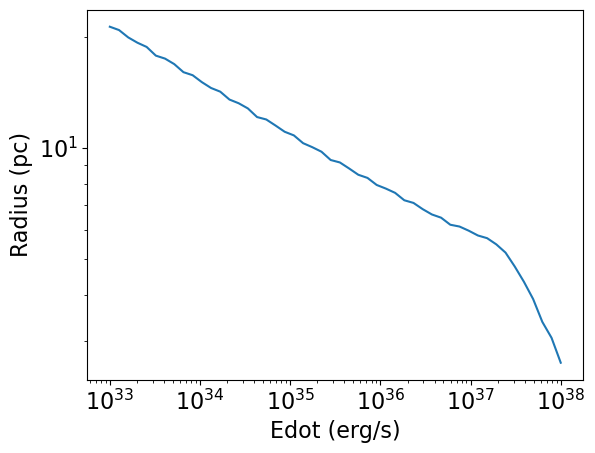

In [9]:
plt.plot(edot,radii)
plt.semilogx()
plt.semilogy()
plt.xlabel("Edot (erg/s)")
plt.ylabel("Radius (pc)")

Text(0.5, 0, 'Gamma-ray spectral index')

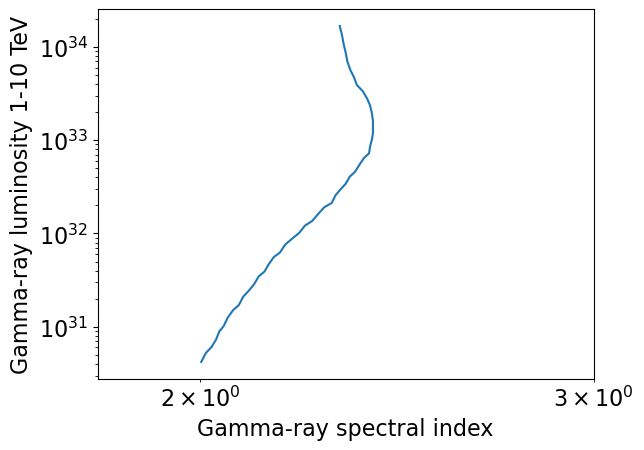

In [10]:
plt.plot(indices,lum1to10)
plt.semilogx()
plt.semilogy()
plt.xlim(1.8,3.0)
plt.ylabel("Gamma-ray luminosity 1-10 TeV")
plt.xlabel("Gamma-ray spectral index")